In [46]:
name = "/home/mehdi/Nextcloud/experiments/betweenness_discrete/general/hospital_ward.csv"
directed = True
stri = ["non-strict"]
be = ["bet", "bet_exact"]
if directed:
    path = name+"_directed_exp/"
else:
    path = name+"_undirected_exp/"
#path = path + "_boost/"
cost_type = [["shortest","passive"], ["shortest","active"], ["shortestfastest","passive"] , ["shortestfastest","active"], ["foremost","passive"] , ["shortestforemost","passive"]]
app = [2,5,10,20,40,60,-1]

In [47]:
name_short= name.split("/")
name_short = name_short[-1]
name_short = name_short.split(".")
name_short = name_short[0]
print(name_short)

hospital_ward


In [48]:
print(" & nodes & events & edges & sh ac & sh pa & non sh ac & non sh pa\\\\ ")
f = open(path+"info_-1.txt", "r")
print(name,end='')
i = 0
for x in f:
    x = x[:-1]
    res = x.split(" ")
    if i == 0:
        n = int(res[-1])
    if i == 1:
        T = int(res[-1])
    print(" & $"+res[-1][:6]+"$",end='')
    i = i + 1
print("\\\\")

 & nodes & events & edges & sh ac & sh pa & non sh ac & non sh pa\\ 
/home/mehdi/Nextcloud/experiments/betweenness_discrete/general/hospital_ward.csv & $75$ & $9453$ & $32424$ & $4298.4$ & $305.34$ & $741.53$ & $347.63$ & $498.57$ & $875.67$\\


In [50]:
res = dict()
res_bet = dict()
res_sum_node = dict()
res_sum_time = dict()

# res_sum_node = [0 for i in range(n)]
# res_sum_time = [0 for i in range(T)]

for b in be:
    for st in stri:
        for co in cost_type:
            for ap in app:
                #print(path+b+"_"+st+"_"+co[0]+"_"+co[1]+"_"+str(ap)+".txt")
                f = open(path+b+"_"+st+"_"+co[0]+"_"+co[1]+"_"+str(ap)+".txt", "r")
                if ap not in res:
                    res[ap] = dict()
                if ap not in res_bet:
                    res_bet[ap] = dict()
                if ap not in res_sum_node:
                    res_sum_node[ap] = dict()
                if ap not in res_sum_time:
                    res_sum_time[ap] = dict()
                    
                if st not in res[ap]:
                    res[ap][st] = dict()
                if st not in res_bet[ap]:
                    res_bet[ap][st] = dict()
                if st not in res_sum_node[ap]:
                    res_sum_node[ap][st] = dict()
                if st not in res_sum_time[ap]:
                    res_sum_time[ap][st] = dict()
                    
                if b not in res_bet[ap][st]:
                    res_bet[ap][st][b] = dict()
                res_bet[ap][st][b][co[0]+"_"+co[1]] = []
                
                if b not in res[ap][st]:
                    res[ap][st][b] = dict()
                    
                if b not in res_sum_node[ap][st]:
                    res_sum_node[ap][st][b] = dict()
                if b not in res_sum_time[ap][st]:
                    res_sum_time[ap][st][b] = dict()

                if co[1] not in res[ap][st][b]:
                    res[ap][st][b][co[1]] = dict()
                if co[1] not in res_sum_node[ap][st][b]:
                    res_sum_node[ap][st][b][co[1]] = dict()
                if co[1] not in res_sum_time[ap][st][b]:
                    res_sum_time[ap][st][b][co[1]] = dict()

                res[ap][st][b][co[1]][co[0]] = []
                
                res_sum_time[ap][st][b][co[1]][co[0]] = [0 for i in range(T)]
                res_sum_node[ap][st][b][co[1]][co[0]] = [0 for i in range(n)]

                
                
                i = 0
                for x in f:
                    res_sum_node[ap][st][b][co[1]][co[0]][i//T] +=  float(x)
                    res_sum_time[ap][st][b][co[1]][co[0]][i%T] += float(x)
                    res[ap][st][b][co[1]][co[0]].append(float(x))
                    res_bet[ap][st][b][co[0]+"_"+co[1]].append(float(x))
                    i += 1

In [152]:
#dfference tau active passive
#print(" & \shortstack{act sh\\\\pas sh} & \shortstack{act sh\\\\pas sh}  & \shortstack{act sh\\\\pas sh}& \shortstack{act sf\\\\pas sf} & \shortstack{act sf\\\\pas sf} & \shortstack{act sf\\\\pas sf}\\\\" ) 
import scipy.stats as stats
tau1, p_value = stats.kendalltau(res[-1]["non-strict"]["bet_exact"]["active"]["shortest"], res[-1]["non-strict"]["bet_exact"]["passive"]["shortest"])
tau2, p_value = stats.kendalltau(res_sum_node[-1]["non-strict"]["bet_exact"]["active"]["shortest"], res_sum_node[-1]["non-strict"]["bet_exact"]["passive"]["shortest"])
tau3, p_value = stats.kendalltau(res_sum_time[-1]["non-strict"]["bet_exact"]["active"]["shortest"], res_sum_time[-1]["non-strict"]["bet_exact"]["passive"]["shortest"])

tau4, p_value = stats.kendalltau(res[-1]["strict"]["bet_exact"]["active"]["shortest"], res[-1]["strict"]["bet_exact"]["passive"]["shortest"])
tau5, p_value = stats.kendalltau(res_sum_node[-1]["strict"]["bet_exact"]["active"]["shortest"], res_sum_node[-1]["strict"]["bet_exact"]["passive"]["shortest"])
tau6, p_value = stats.kendalltau(res_sum_time[-1]["strict"]["bet_exact"]["active"]["shortest"], res_sum_time[-1]["strict"]["bet_exact"]["passive"]["shortest"])

tau7, p_value = stats.kendalltau(res[-1]["non-strict"]["bet_exact"]["active"]["shortest"], res[-1]["strict"]["bet_exact"]["active"]["shortest"])
tau8, p_value = stats.kendalltau(res_sum_node[-1]["non-strict"]["bet_exact"]["active"]["shortest"], res_sum_node[-1]["strict"]["bet_exact"]["active"]["shortest"])
tau9, p_value = stats.kendalltau(res_sum_time[-1]["non-strict"]["bet_exact"]["active"]["shortest"], res_sum_time[-1]["strict"]["bet_exact"]["active"]["shortest"])

tau10, p_value = stats.kendalltau(res[-1]["non-strict"]["bet_exact"]["passive"]["shortest"], res[-1]["strict"]["bet_exact"]["passive"]["shortest"])
tau11, p_value = stats.kendalltau(res_sum_node[-1]["non-strict"]["bet_exact"]["passive"]["shortest"], res_sum_node[-1]["strict"]["bet_exact"]["passive"]["shortest"])
tau12, p_value = stats.kendalltau(res_sum_time[-1]["non-strict"]["bet_exact"]["passive"]["shortest"], res_sum_time[-1]["strict"]["bet_exact"]["passive"]["shortest"])


print(name+ "& $"+str(tau1)[:4]+"$ & $"+str(tau2)[:4]+"$ & $"+str(tau3)[:4]+"$ & $"+str(tau4)[:4]+"$ & $"+str(tau5)[:4]+"$ & $"+str(tau6)[:4]+ "$ & $"+str(tau7)[:4]+"$ & $"+str(tau8)[:4]+"$ & $"+str(tau9)[:4]+"$ & $"+str(tau10)[:4]+"$ & $"+str(tau11)[:4]+"$ & $"+str(tau12)[:4] +"$\\\\")


/home/mehdi/Nextcloud/experiments/betweenness_discrete/shortest/highschool_2012.csv& $0.98$ & $0.68$ & $0.54$ & $0.98$ & $0.68$ & $0.54$ & $0.99$ & $0.99$ & $0.99$ & $0.99$ & $0.99$ & $0.99$\\


In [153]:
#dfference tau bet and exact bet
import scipy.stats as stats
print(name,end='')
for st in stri:
    for e in cost_type:
        tau, p_value = stats.kendalltau(res_bet[-1][st]["bet"][e[0]+"_"+e[1]], res_bet[-1][st]["bet_exact"][e[0]+"_"+e[1]])
        tau2, p_value = stats.kendalltau(res_sum_node[-1][st]["bet"][e[1]][e[0]], res_sum_node[-1][st]["bet_exact"][e[1]][e[0]])
        tau3, p_value = stats.kendalltau(res_sum_time[-1][st]["bet"][e[1]][e[0]], res_sum_time[-1][st]["bet_exact"][e[1]][e[0]])

        print("& $"+str(tau)[:4]+"$"+"& $"+str(tau2)[:4]+"$"+"& $"+str(tau3)[:4]+"$",end='')
print("\\\\")


/home/mehdi/Nextcloud/experiments/betweenness_discrete/shortest/highschool_2012.csv& $0.96$& $0.98$& $0.75$& $0.94$& $0.66$& $0.44$& $0.96$& $0.98$& $0.75$& $0.94$& $0.66$& $0.44$\\


In [154]:
def size_inter_10(x,y):
    xx = [(x[i],i) for i in range(0,len(x))]
    yy = [(y[i],i) for i in range(0,len(y))]
    xx.sort(reverse=True)
    yy.sort(reverse=True)
    rx = { xx[i][1]  for i in range(0,10)}
    ry = { yy[i][1]  for i in range(0,10)}
    return len(rx.intersection(ry))
    

In [155]:
#dfference size intersection active passive
#print(" & ac sh vs. pas sh & act sf vs. pas sf & ex act sh vs. pas sh & ex act sf vs. pas sf \\\\" ) 
import scipy.stats as stats
s1 = size_inter_10(res[-1]["non-strict"]["bet_exact"]["active"]["shortest"], res[-1]["non-strict"]["bet_exact"]["passive"]["shortest"])
s2 = size_inter_10(res_sum_node[-1]["non-strict"]["bet_exact"]["active"]["shortest"], res_sum_node[-1]["non-strict"]["bet_exact"]["passive"]["shortest"])
s3 = size_inter_10(res_sum_time[-1]["non-strict"]["bet_exact"]["active"]["shortest"], res_sum_time[-1]["non-strict"]["bet_exact"]["passive"]["shortest"])


s4 = size_inter_10(res[-1]["strict"]["bet_exact"]["active"]["shortest"], res[-1]["strict"]["bet_exact"]["passive"]["shortest"])
s5 = size_inter_10(res_sum_node[-1]["strict"]["bet_exact"]["active"]["shortest"], res_sum_node[-1]["strict"]["bet_exact"]["passive"]["shortest"])
s6 = size_inter_10(res_sum_time[-1]["strict"]["bet_exact"]["active"]["shortest"], res_sum_time[-1]["strict"]["bet_exact"]["passive"]["shortest"])

s7 = size_inter_10(res[-1]["non-strict"]["bet_exact"]["active"]["shortest"], res[-1]["strict"]["bet_exact"]["active"]["shortest"])
s8 = size_inter_10(res_sum_node[-1]["non-strict"]["bet_exact"]["active"]["shortest"], res_sum_node[-1]["strict"]["bet_exact"]["active"]["shortest"])
s9 = size_inter_10(res_sum_time[-1]["non-strict"]["bet_exact"]["active"]["shortest"], res_sum_time[-1]["strict"]["bet_exact"]["active"]["shortest"])

s10 = size_inter_10(res[-1]["non-strict"]["bet_exact"]["passive"]["shortest"], res[-1]["strict"]["bet_exact"]["passive"]["shortest"])
s11 = size_inter_10(res_sum_node[-1]["non-strict"]["bet_exact"]["passive"]["shortest"], res_sum_node[-1]["strict"]["bet_exact"]["passive"]["shortest"])
s12 = size_inter_10(res_sum_node[-1]["non-strict"]["bet_exact"]["passive"]["shortest"], res_sum_time[-1]["strict"]["bet_exact"]["passive"]["shortest"])

print(name+ "& $"+str(s1)[:4]+"$ & $"+str(s2)[:4]+"$ & $"+str(s3)[:4]+"$ & $"+str(s4)[:4] + "$ & $"+str(s5)[:4]+"$ & $"+str(s6)[:4]+"$ & $"+str(s7)[:4]+"$ & $"+str(s8)[:4]+ "$ & $"+str(s9)[:4]+"$ & $"+str(s10)[:4]+"$ & $"+str(s11)[:4]+"$ & $"+str(s12)[:4] +"$\\\\")


/home/mehdi/Nextcloud/experiments/betweenness_discrete/shortest/highschool_2012.csv& $0$ & $5$ & $2$ & $0$ & $5$ & $2$ & $10$ & $10$ & $10$ & $9$ & $10$ & $0$\\


In [227]:
# res_shrink = dict()
# for b in ["bet","bet_exact"]:
#     res_shrink[b] = dict()
#     res_shrink[b]["passive"] = dict()
#     res_shrink[b]["active"] = dict()
#     for s in ["shortest","shortestfastest"]:
#         res_shrink[b]["active"][s] = []
#         res_shrink[b]["passive"][s] = []
#         for i in range(0,len(res[b]["active"][s])): 
#             if not (res[b]["active"][s][i] == res[b]["passive"][s][i] and res[b]["active"][s][i] == 0):
#                 res_shrink[b]["active"][s].append(res[b]["active"][s][i])
#                 res_shrink[b]["passive"][s].append(res[b]["passive"][s][i])

In [228]:
# #dfference tau active passive reduced
# print(" & act sh vs. pas sh & act sf vs. pas sf & ex act sh vs. pas sh & ex act sf vs. pas sf \\\\" ) 
# import scipy.stats as stats
# tau, p_value = stats.kendalltau(res_shrink["bet"]["active"]["shortest"], res_shrink["bet"]["passive"]["shortest"])
# tau2, p_value = stats.kendalltau(res_shrink["bet"]["active"]["shortestfastest"], res_shrink["bet"]["passive"]["shortestfastest"])
# tau3, p_value = stats.kendalltau(res_shrink["bet_exact"]["active"]["shortest"], res_shrink["bet_exact"]["passive"]["shortest"])
# tau4, p_value = stats.kendalltau(res_shrink["bet_exact"]["active"]["shortestfastest"], res_shrink["bet_exact"]["passive"]["shortestfastest"])
# print(name+ "& $"+str(tau)[:4]+"$ & $"+str(tau2)[:4]+"$ & $"+str(tau3)[:4]+"$ & $"+str(tau4)[:4]+"$\\\\")


 & act sh vs. pas sh & act sf vs. pas sf & ex act sh vs. pas sh & ex act sf vs. pas sf \\
/home/mehdi/Nextcloud/experiments/betweenness_discrete/primaryschool.csv& $0.82$ & $0.98$ & $0.75$ & $0.85$\\


In [116]:
max_elem = [ [res_sum_node[-1]["non-strict"]["bet_exact"]["passive"]["shortest"][i],i] for i in range(0,len(res_sum_node[-1]["non-strict"]["bet_exact"]["passive"]["shortest"])) ]
max_elem.sort(reverse=True)

In [117]:
max_elem

[[809.9966028499972, 220],
 [709.0273665999944, 222],
 [674.7889666209968, 221],
 [629.2937343935972, 199],
 [617.5993213100015, 53],
 [567.30253942, 172],
 [533.7074210580005, 7],
 [529.5996567000195, 0],
 [526.9333232120005, 149],
 [521.32934566, 60],
 [521.0296922900012, 54],
 [506.5445935500001, 30],
 [501.15322151999993, 86],
 [493.494652334003, 49],
 [489.69925153245737, 156],
 [487.95643623199953, 100],
 [487.5951478199991, 185],
 [484.8113675000001, 8],
 [480.6757472229976, 101],
 [479.3888837400004, 176],
 [478.5509235630004, 24],
 [472.79960653360087, 183],
 [457.63835330300066, 143],
 [450.6348252587972, 207],
 [435.53041628200015, 113],
 [427.4530856902265, 9],
 [417.5282414144991, 72],
 [415.54145611600023, 85],
 [413.53871904999806, 22],
 [410.44501403400056, 110],
 [404.1955772622994, 198],
 [394.1326302699961, 135],
 [393.42444249219017, 119],
 [389.6622693100002, 47],
 [388.19138912100016, 1],
 [386.6100276099991, 104],
 [383.9658505969994, 204],
 [382.5660440869999, 3

In [111]:
f = open("../build.build/nodesIds.txt", "r")
node = dict()
for x in f:
    x = x[:-1]
    res = x.split(" ")
    #print(res)
    node[res[0]] = res[1]

In [71]:
#hospital ward
f = open("examples/hospital_ward.csv", "r")
d = dict()
for x in f:
    x = x[:-1]
    res = x.split("\t")
    d[res[0]] = res[3]
    d[res[1]] = res[4]
for x,y in max_elem:
    print(d[(node[str(y)])])

NUR
MED
NUR
NUR
NUR
NUR
NUR
ADM
MED
NUR
NUR
PAT
MED
MED
NUR
ADM
NUR
MED
NUR
NUR
NUR
PAT
PAT
PAT
MED
PAT
MED
NUR
NUR
NUR
MED
NUR
NUR
NUR
PAT
ADM
MED
PAT
NUR
NUR
PAT
PAT
PAT
NUR
NUR
MED
PAT
PAT
PAT
NUR
PAT
PAT
ADM
MED
ADM
PAT
NUR
PAT
NUR
PAT
PAT
PAT
PAT
PAT
ADM
PAT
NUR
ADM
PAT
PAT
PAT
PAT
PAT
PAT
ADM


In [90]:
#workplace_2013
f = open("examples/metadata_workplace_2013.txt", "r")
d = dict()
for x in f:
    x = x[:-1]
    res = x.split("\t")
    d[res[0]] = res[1]
for x,y in max_elem:
    print(d[(node[str(y)])])

DMCT
DSE
SRH
SRH
DSE
DISQ
DSE
DMCT
DSE
DSE
DISQ
DMCT
DMCT
DSE
DMCT
DSE
DSE
DSE
DISQ
DMCT
DSE
DSE
DISQ
DISQ
DSE
DISQ
SRH
DISQ
DSE
DSE
SRH
DMCT
SFLE
DMCT
SFLE
DSE
DSE
DMCT
DSE
DISQ
DSE
DSE
DMCT
DSE
SRH
DSE
DISQ
DMCT
DMCT
SRH
SRH
DMCT
DMCT
SRH
DMCT
DSE
DMCT
DSE
DMCT
DSE
SRH
DSE
DISQ
DSE
DMCT
DISQ
SRH
DMCT
SRH
DMCT
DSE
DISQ
DSE
SRH
DMCT
DMCT
DSE
DMCT
DMCT
DMCT
DMCT
DISQ
SFLE
DSE
DSE
SFLE
DSE
DSE
SRH
DISQ
DSE
DISQ


In [97]:
#hs 2011
f = open("examples/metadata_highschool_2011.txt", "r")
d = dict()
for x in f:
    x = x[:-1]
    res = x.split("\t")
    d[res[0]] = res[1]
for x,y in max_elem:
    print(d[(node[str(y)])])

PC*
PSI*
PSI*
PSI*
PC*
PC
PC*
PC*
PC
PSI*
PC
PSI*
teacher
PSI*
PC*
PC
PC*
PC*
PSI*
PC
PC*
PC*
PC*
PC*
PSI*
PSI*
PC
PSI*
PC
PC*
PSI*
PC*
PSI*
PC*
PC*
PSI*
PSI*
PSI*
PC*
PC
PC*
PC
PC
PC
PC
PC
PC
PC*
PSI*
PC*
PC
PSI*
PC*
PSI*
PSI*
PC
PSI*
PC
PC
PC*
PC*
PC
PC*
PC
PSI*
PC
PC*
PC*
PC*
PSI*
PC
PC*
PC
PC
PC*
PC
PSI*
PSI*
PC
PSI*
PC
PC
PC*
PSI*
PSI*
PC*
PSI*
teacher
PC*
PSI*
PSI*
PSI*
PSI*
teacher
PC*
PSI*
PC*
PC*
PC*
PC*
PC*
PSI*
PSI*
PC*
teacher
PC*
PSI*
PSI*
PSI*
PC*
PSI*
PC*
PC*
PSI*
PC
PC*
PC*
PC
PC
PC*
PSI*
teacher
teacher
teacher
PSI*
teacher


In [104]:
#hs 2012
f = open("examples/metadata_highschool_2012.txt", "r")
d = dict()
for x in f:
    x = x[:-1]
    res = x.split("\t")
    d[res[0]] = res[1]
for x,y in max_elem:
    print(d[(node[str(y)])])

PSI*
PSI*
MP*2
MP*1
MP*2
PC
PC
PC*
MP*2
MP*1
PSI*
PC
PC*
MP*1
PC
MP*1
PSI*
PC*
PSI*
MP*2
PC
PSI*
PSI*
PC
MP*1
PSI*
MP*2
PSI*
PSI*
PC
MP*2
PC*
PC*
PC
PC
PC
PSI*
PC
MP*1
MP*1
PC
PC*
MP*1
PC
MP*1
MP*2
PSI*
MP*2
PC
PC*
PC*
MP*2
PC
PC
MP*1
PC*
PC
PSI*
PSI*
PC*
MP*1
PSI*
MP*1
MP*1
MP*1
PC*
MP*2
PC*
PSI*
MP*2
PC
PC
MP*1
MP*2
PC
PSI*
MP*1
PC
MP*1
PSI*
MP*1
PSI*
PC
PC
PC*
PSI*
MP*2
PC*
MP*1
PSI*
PSI*
PSI*
PC
MP*2
PC
PC*
MP*2
PSI*
MP*1
MP*2
PC
PC*
PSI*
MP*2
PC*
PC*
MP*2
PC*
PSI*
PC*
PC*
MP*1
MP*2
MP*2
MP*2
PSI*
PC*
MP*2
MP*1
PSI*
PSI*
PSI*
PC
PC*
PC
MP*2
MP*2
PSI*
MP*2
PSI*
MP*1
MP*1
PSI*
PC*
PC*
MP*2
PC*
MP*1
MP*1
MP*1
PC*
PC*
PC
MP*2
PC
PC
PC*
MP*2
PC*
PC
MP*2
PC*
MP*2
PC*
MP*1
PSI*
MP*1
PSI*
PC*
PC
MP*1
MP*2
PC
MP*2
PC*
PSI*
PC
PSI*
PC
PC
PSI*
MP*2
MP*2
PC*
PSI*
MP*1
PC
PSI*
PSI*
MP*2


In [119]:
#primary
f = open("examples/metadata_primaryschool.txt", "r")
d = dict()
for x in f:
    x = x[:-1]
    res = x.split("\t")
    d[res[0]] = res[1]
for x,y in max_elem:
    print(d[(node[str(y)])])

2B
2B
2B
3B
2A
3A
4B
3B
4A
5A
2A
1A
4B
5A
1B
1B
3B
1B
1B
3B
1A
3B
4A
2B
4B
1B
2A
2A
4A
2A
3A
1B
1B
5A
3B
Teachers
2B
5A
5B
4B
5B
5B
3A
5B
4A
5B
1B
1A
1A
4B
4B
2B
2A
1B
3B
3B
4B
2B
1B
4B
3A
5B
Teachers
1B
1B
4A
2A
3A
5B
1A
5B
1A
4A
3B
2B
5A
2B
Teachers
5B
1A
2A
5B
3A
4A
1A
2B
1B
1A
5A
3A
3B
4A
1B
1A
3B
5A
5B
3B
5B
1A
4B
3A
3A
3B
3B
2A
3A
3A
1B
5A
1A
1A
5B
2B
Teachers
5B
2A
Teachers
4A
1A
2B
4A
1A
5A
4A
5A
2B
3A
4A
2A
4B
5A
5A
5B
5A
2A
1B
4A
4B
1B
5A
1B
1A
2B
3A
Teachers
5A
Teachers
2A
5A
1A
Teachers
2A
3A
1B
2A
4B
1A
5A
3A
3A
2A
3B
3B
5B
1B
3A
3A
5B
5B
2A
5B
1A
3B
2A
3A
3A
5A
4A
4B
5B
4A
4B
2A
4B
5A
2A
3A
2A
4A
4A
1B
3B
2B
4A
1A
1B
2B
Teachers
1B
3B
2B
4B
4B
2A
1B
2B
3B
4A
3B
2B
Teachers
5A
4B
4B
2B
5B
4B
2B
2B
2B
4B
5A
3A
2B
1A
1A
1B
2B
4A
3B
3A
4B
5B
2A
5A
4B
1A
5B
4A
2B
5B


In [42]:
d = dict()

In [51]:
#min max
import scipy.stats as stats
import matplotlib.pyplot as plt
s = "non-strict"
mini = -1
maxi = -1
points = [2,5,10,20,40,60,-1]
color = "red"
for co in cost_type:
    res_ap = []
    ty = co[1]
    c = co[0]
    i = points[-2]
    tab = [ stats.kendalltau(res_sum_node[-1][s]["bet_exact"][ty][c], res_sum_node[points[j]][s]["bet_exact"][ty][c])[0] for j in range(0,len(points)) ]
    
    if mini == -1:
        mini = stats.kendalltau(res_sum_node[-1][s]["bet_exact"][ty][c], res_sum_node[i][s]["bet_exact"][ty][c])[0]
        val_min = (ty,c)
        tab_min = tab[:]
    if maxi == -1:
        maxi = stats.kendalltau(res_sum_node[-1][s]["bet_exact"][ty][c], res_sum_node[i][s]["bet_exact"][ty][c])[0]
        val_max = (ty,c)
        tab_max = tab[:]
    if(stats.kendalltau(res_sum_node[-1][s]["bet_exact"][ty][c], res_sum_node[i][s]["bet_exact"][ty][c])[0] ) < mini:
        mini = stats.kendalltau(res_sum_node[-1][s]["bet_exact"][ty][c], res_sum_node[i][s]["bet_exact"][ty][c])[0]
        val_min = (ty,c)
        tab_min = tab[:]
    if(stats.kendalltau(res_sum_node[-1][s]["bet_exact"][ty][c], res_sum_node[i][s]["bet_exact"][ty][c])[0] ) > maxi:
        val_max = (ty,c)
        maxi = stats.kendalltau(res_sum_node[-1][s]["bet_exact"][ty][c], res_sum_node[i][s]["bet_exact"][ty][c])[0]
        tab_max = tab[:]
d[name_short] = dict()
d[name_short][(0.5,val_min,color)] = tab_min
d[name_short][(1,val_max,color)] = tab_max

In [52]:
d

{'ht09': {(0.5, ('active', 'shortest'), 'blue'): [0.33871164215163213,
   0.48165872318138003,
   0.5049109655947412,
   0.6014538558786346,
   0.738621997471555,
   0.7967762326169405,
   1.0],
  (1, ('passive', 'shortestfastest'), 'blue'): [0.612811311522209,
   0.6340859563508047,
   0.7378144834721514,
   0.8074676680462907,
   0.8624290150208579,
   0.9116485019826608,
   1.0]},
 'hospital_ward': {(0.5,
   ('active', 'shortestfastest'),
   'red'): [0.5597267582692731, 0.5958011926103184, 0.7516778248818469, 0.8597359563037823, 0.896700933987301, 0.8904109589041095, 0.9999999999999999],
  (1, ('passive', 'shortestforemost'), 'red'): [0.6100538923614278,
   0.6809257813153499,
   0.8167834077251662,
   0.8286660629227164,
   0.94020218786552,
   0.9558479160439619,
   1.0]}}

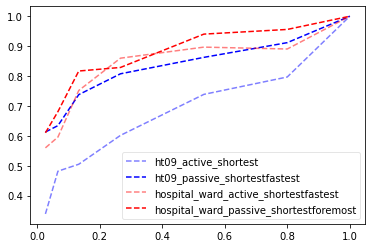

In [53]:
points_prop = [2/n,5/n,10/n,20/n,40/n,60/n,n/n]
for nam in d.keys():
    for elem in d[nam].keys():
        x,co,z = elem
        
        plt.plot(points_prop,d[nam][elem],'--', label=nam+"_"+co[0]+"_"+co[1], color=z,alpha = x)

leg = plt.legend(loc='best')
leg.get_frame().set_alpha(0.5)
plt.show()

passive shortest
active shortest
passive shortestfastest
active shortestfastest
passive foremost
passive shortestforemost


/tmp/ipykernel_6227/3489386121.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(points_prop,res_ap,'g--', label=co[0]+"_"+co[1], c=plt.cm.viridis(i/nb))


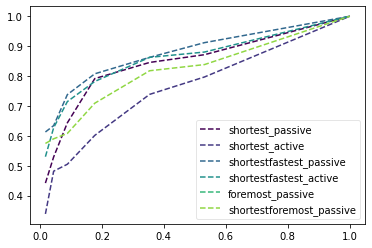

In [12]:
#approx agg node
import scipy.stats as stats
import matplotlib.pyplot as plt


#c = "shortest"
s = "non-strict"
i = 0
nb = len(cost_type)
points = [2,5,10,20,40,60,-1]
points_prop = [2/n,5/n,10/n,20/n,40/n,60/n,n/n]

for co in cost_type:
    res_ap = []
    ty = co[1]
    c = co[0]
    print(ty,c)
    for a in points:
        res_ap.append(stats.kendalltau(res_sum_node[-1][s]["bet_exact"][ty][c], res_sum_node[a][s]["bet_exact"][ty][c])[0] )
    plt.plot(points_prop,res_ap,'g--', label=co[0]+"_"+co[1], c=plt.cm.viridis(i/nb))
    i = i +1
leg = plt.legend(loc='best')
leg.get_frame().set_alpha(0.5)
plt.show()

passive shortest
active shortest
passive shortestfastest
active shortestfastest
passive foremost
passive shortestforemost


/tmp/ipykernel_20305/3441255776.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(points_prop,res_ap,'g--', label=co[0]+"_"+co[1], c=plt.cm.viridis(i/nb))


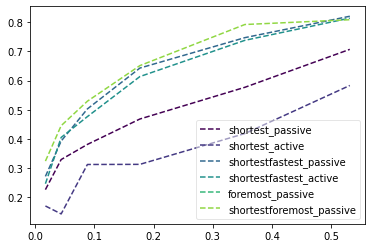

In [22]:
#approx agg time
import scipy.stats as stats
import matplotlib.pyplot as plt

i = 0
nb = len(cost_type)
for co in cost_type:
    res_ap = []
    ty = co[1]
    c = co[0]
    print(ty,c)
    for a in points:
        res_ap.append(stats.kendalltau(res_sum_time[-1][s]["bet_exact"][ty][c], res_sum_time[a][s]["bet_exact"][ty][c])[0] )
    plt.plot(points_prop,res_ap,'g--', label=co[0]+"_"+co[1], c=plt.cm.viridis(i/nb))
    i = i +1
leg = plt.legend(loc='best')
leg.get_frame().set_alpha(0.5)
plt.show()

passive shortest


/tmp/ipykernel_20305/4216570734.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(points_prop,res_ap,'g--', label=co[0]+"_"+co[1], c=plt.cm.viridis(i/nb))


active shortest
passive shortestfastest
active shortestfastest
passive foremost
passive shortestforemost


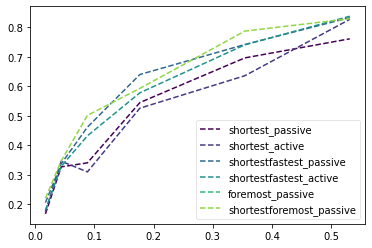

In [23]:
#approx all
import scipy.stats as stats
import matplotlib.pyplot as plt

i = 0
nb = len(cost_type)
for co in cost_type:
    res_ap = []
    ty = co[1]
    c = co[0]
    print(ty,c)
    for a in points:
        res_ap.append(stats.kendalltau(res[-1][s]["bet_exact"][ty][c], res[a][s]["bet_exact"][ty][c])[0] )
    plt.plot(points_prop,res_ap,'g--', label=co[0]+"_"+co[1], c=plt.cm.viridis(i/nb))
    i = i +1
leg = plt.legend(loc='best')
leg.get_frame().set_alpha(0.5)
plt.show()